![OIP.jpg](attachment:OIP.jpg)

# Final Year Project
# Title:- Maternal Health Risk Detection

## Contents
## I. Project  Abstract;
## II. Problem Statement;
## III. Dataset Information;
## IV.  Solving the Problem:
#### #1. Importing Necessary Libraries
#### #2. Importing the necessary Datasets
#### #3. Exploratory Data Analysis
#### #4. Data Balancing & Spliting
#### #5. Model Building
#### #6. Model Evaluatinon
#### #7. Saving theSelected Model
#### #8. Visualization of the Dataset
## V. Consclusion.

## I. Project Abstract :
Maternal mortality is a major, but often overlooked, public health problem and is unacceptably high now a days. About 2,95,000 women died during and following pregnancy and childbirth in 2017 alone. The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented with proper care.

Sub-Saharan Africa and Southern Asia accounted for approximately 86% (2,54,000) of the estimated global maternal deaths in 2017. Sub-Saharan Africa alone accounted for roughly two-thirds (1,96,000) of maternal deaths, while Southern Asia accounted for nearly one-fifth (58,000).

At the same time, between 2000 and 2017, Southern Asia achieved the greatest overall reduction in MMR: a decline of nearly 60% (from an MMR of 384 down to 157). Despite its very high MMR in 2017, sub-Saharan Africa as a sub-region also achieved a substantial reduction in MMR of nearly 40% since 2000. Additionally, four other sub-regions roughly halved their MMRs during this period: Central Asia, Eastern Asia, Europe and Northern Africa. Overall, the maternal mortality ratio (MMR) in less-developed countries declined by just under 50%.

## II. Problem Statement:
Since maternal risk and mortality is such a devastating problem, what can be done to decrease these numbers and to save both the maternal and the fetal health? We will be solving this question of how to predict maternal health outcomes based on CTG data and to prevent the loss of an unborn child.

## III. Dataset Information:
### The dataset consist of Cardiotocography (CTG) measures of baby's heart rate from several pregnant women
### Column Description:
* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 0 - Normal, 1 - Suspect, 2 - Pathological

## IV. Solving the Problem

### 1. Importing Necessary Libraries:

In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import BaggingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import Perceptron
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
%matplotlib inline

### 2. Importing the necessary Datasets:

In [ ]:
# Importing training data
df=pd.read_csv('/content/fetal_health.csv')

In [ ]:
# Checking dataset
df

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [ ]:
# Checking the Shape of Data
df.shape

(2126, 22)

In [ ]:
# Creating a new dataset of target Variable alone
df_tar = pd.DataFrame()
df_tar['fetal_health'] = df['fetal_health']
df_tar.sample()

fetal_health
422           2.0

In [ ]:
# Checking for null values in the target variable
for i in df_tar.columns:
    print(i,'=',df_tar[i].isnull().sum(),df_tar[i].dtype)

fetal_health = 0 float64


### There are no missing in the target variable

### 3. Exploratory Data Analysis:

In [ ]:
# Checking whether the index is unique and in order
df.index.is_unique

True

In [ ]:
# Checking for false indexes
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [ ]:
# Viewing the sample of the dataframe
df.sample(10)

baseline value  accelerations  fetal_movement  uterine_contractions  \
493            120.0          0.009           0.091                 0.002   
720            129.0          0.000           0.007                 0.004   
1532           133.0          0.004           0.000                 0.006   
502            130.0          0.008           0.013                 0.004   
218            127.0          0.005           0.008                 0.001   
1107           122.0          0.002           0.000                 0.000   
1961           133.0          0.001           0.000                 0.008   
1544           149.0          0.000           0.000                 0.009   
785            117.0          0.001           0.013                 0.000   
1732           134.0          0.007           0.001                 0.011   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
493                 0.000                   0.0                     0.000   
720                 0.000                   0.0                     0.000   
1532                0.002                   0.0                     0.000   
502                 0.000                   0.0                     0.000   
218                 0.001                   0.0                     0.000   
1107                0.002                   0.0                     0.000   
1961                0.004                   0.0                     0.003   
1544                0.008                   0.0                     0.000   
785                 0.000                   0.0                     0.000   
1732                0.005                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
493                              36.0                                   1.8   
720                              65.0                                   0.4   
1532                             35.0                                   1.1   
502                              36.0                                   1.9   
218                              54.0                                   1.0   
1107                             17.0                                   2.0   
1961                             62.0                                   2.2   
1544                             42.0                                   2.5   
785                              53.0                                   0.7   
1732                             62.0                                   1.2   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
493                                                 0.0       ...   
720                                                73.0       ...   
1532                                                8.0       ...   
502                                                 0.0       ...   
218                                                 5.0       ...   
1107                                                0.0       ...   
1961                                                0.0       ...   
1544                                               23.0       ...   
785                                                 8.0       ...   
1732                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
493            53.0          177.0                        6.0   
720           127.0          134.0                        1.0   
1532          109.0          157.0                        2.0   
502            54.0          172.0                        6.0   
218            63.0          146.0                        9.0   
1107          102.0          148.0                        2.0   
1961           52.0          185.0                        5.0   
1544           51.0          213.0                        4.0   
785            56.0          133.0                        6.0   
1732           80.0          1

In [ ]:
# Dedcribing the properties of the features of the dataset
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [ ]:
# Getting the shape of the dataset
df.shape

(2126, 22)

In [ ]:
# Checking for data correlation
df.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.364066   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

In [ ]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<Axes: >

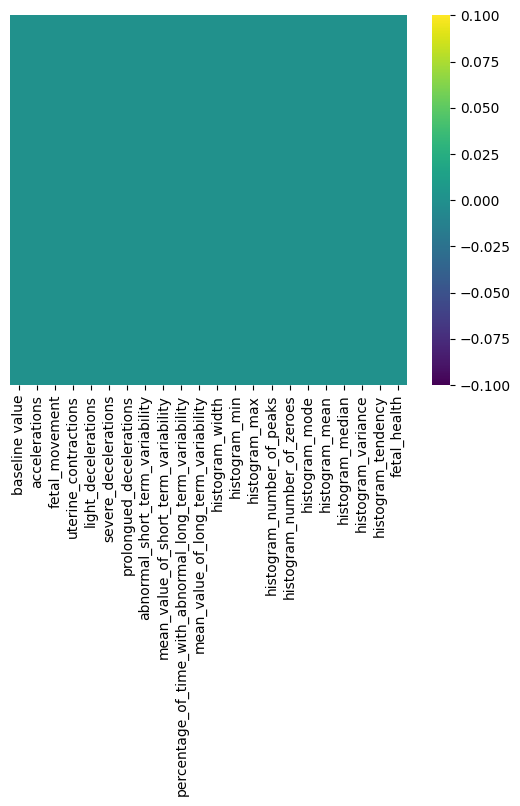

In [ ]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

baseline value = 0 float64
accelerations = 0 float64
fetal_movement = 0 float64
uterine_contractions = 0 float64
light_decelerations = 0 float64
severe_decelerations = 0 float64
prolongued_decelerations = 0 float64
abnormal_short_term_variability = 0 float64
mean_value_of_short_term_variability = 0 float64
percentage_of_time_with_abnormal_long_term_variability = 0 float64
mean_value_of_long_term_variability = 0 float64
histogram_width = 0 float64
histogram_min = 0 float64
histogram_max = 0 float64
histogram_number_of_peaks = 0 float64
histogram_number_of_zeroes = 0 float64
histogram_mode = 0 float64
histogram_mean = 0 float64
histogram_median = 0 float64
histogram_variance = 0 float64
histogram_tendency = 0 float64
fetal_health = 0 float64


### There are no Missing values in the Dataframe

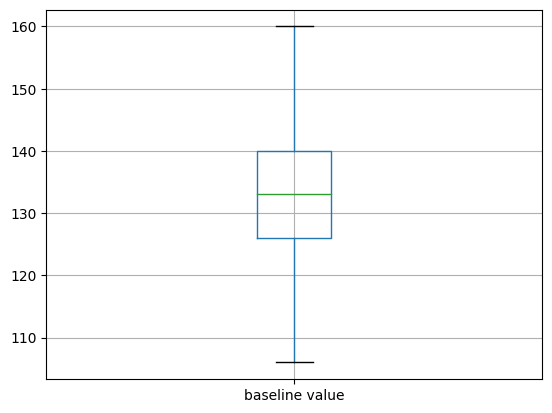

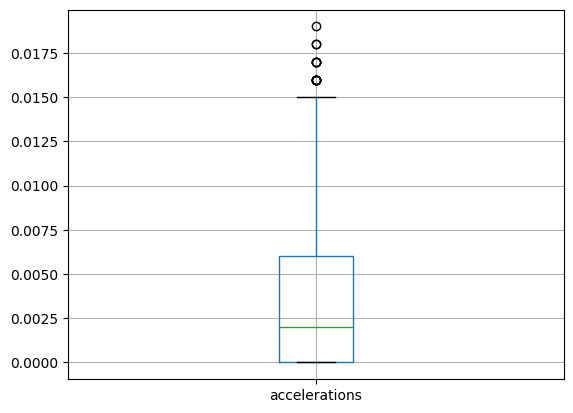

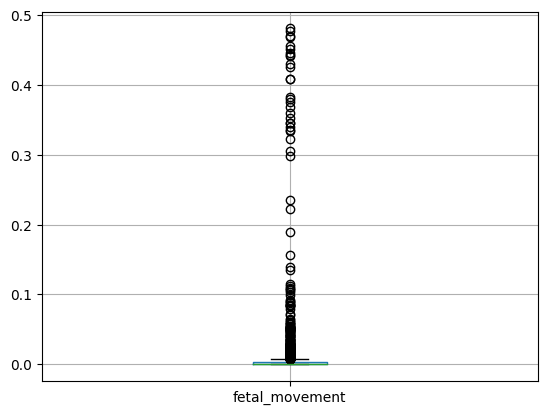

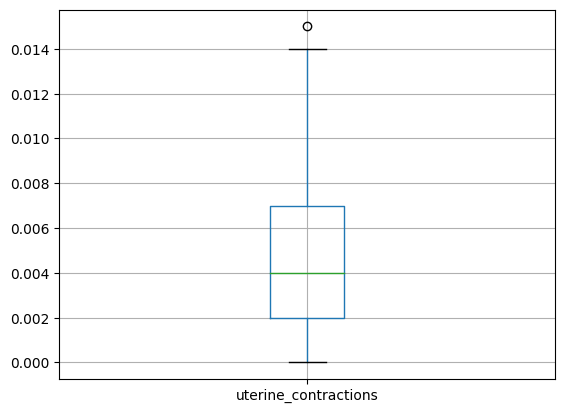

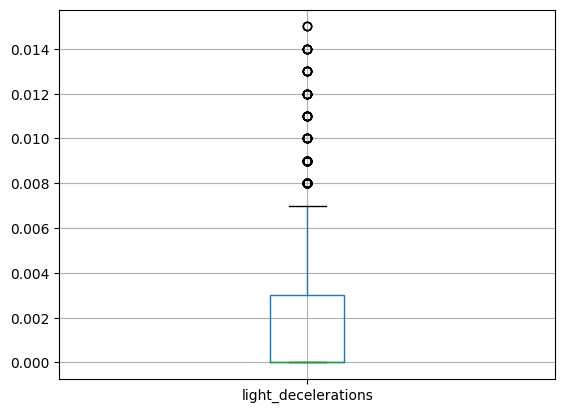

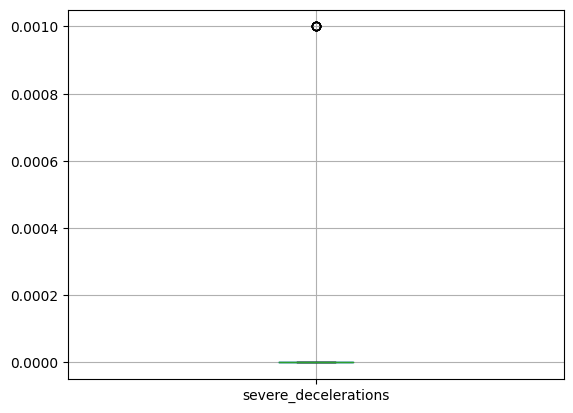

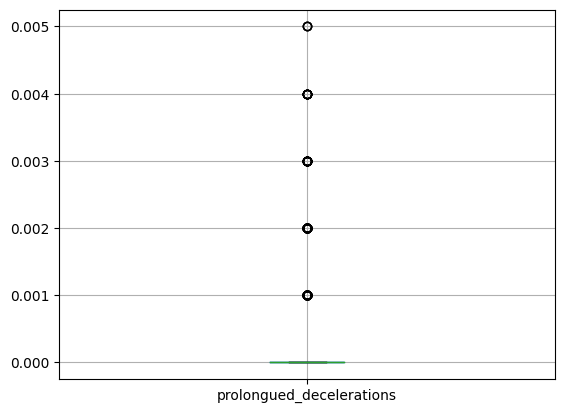

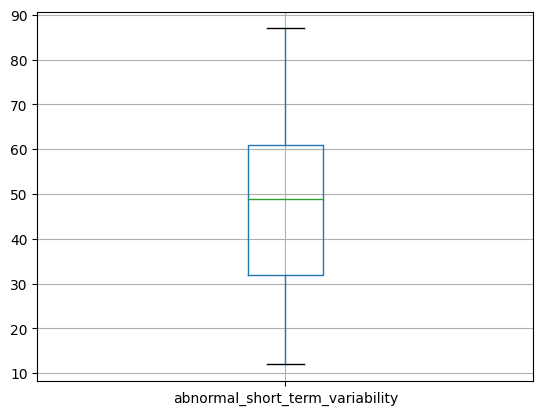

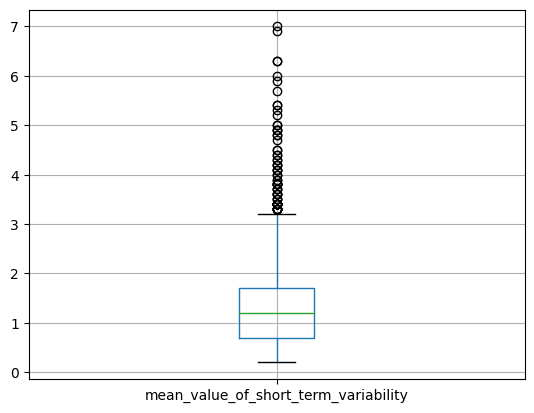

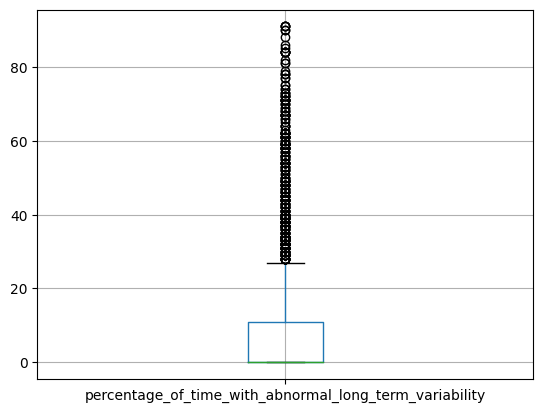

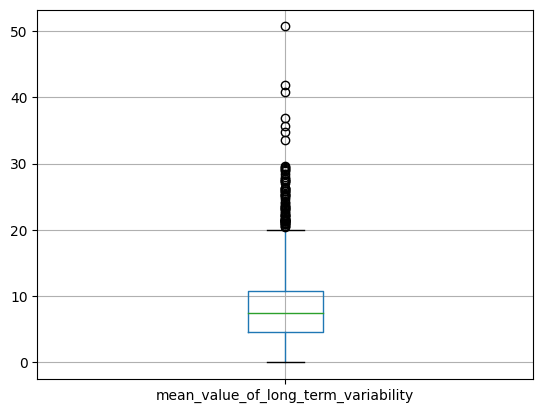

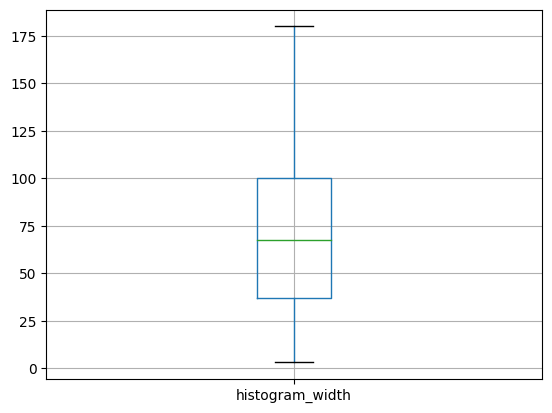

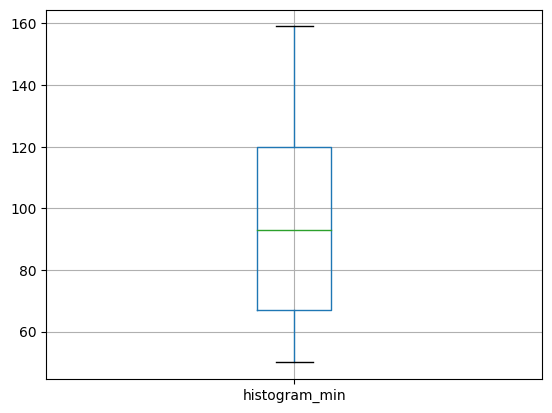

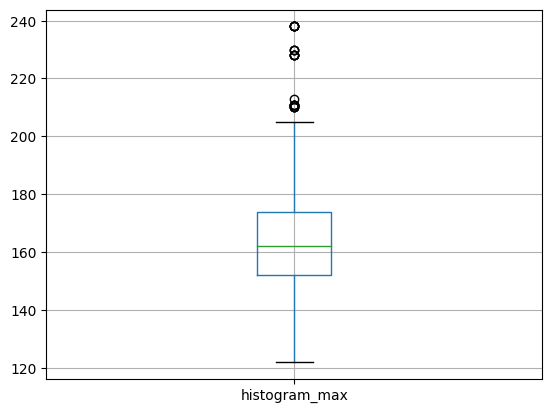

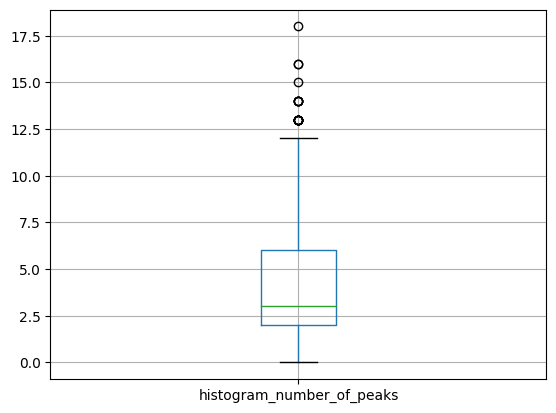

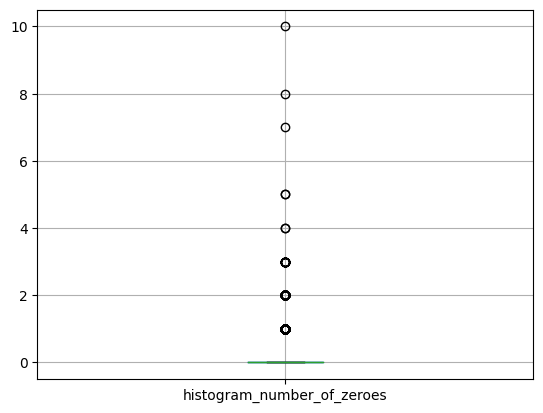

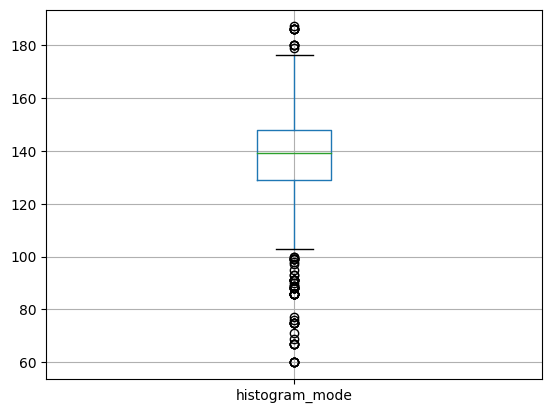

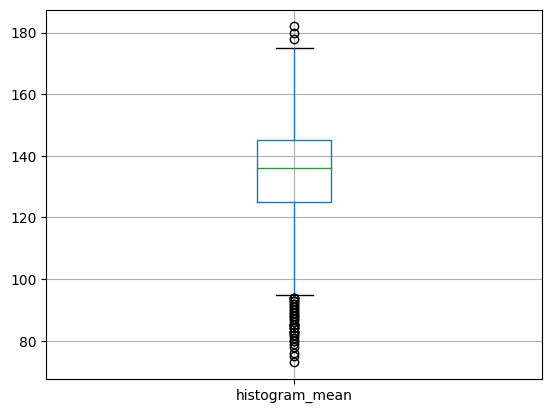

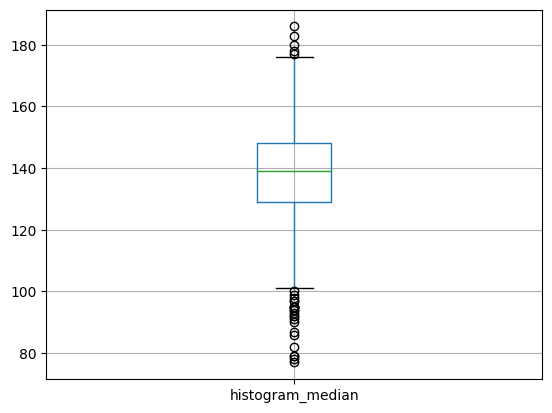

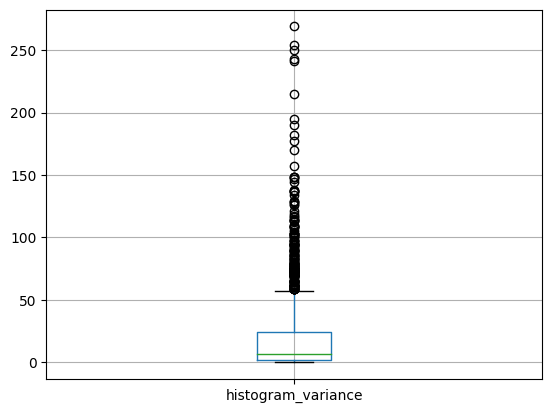

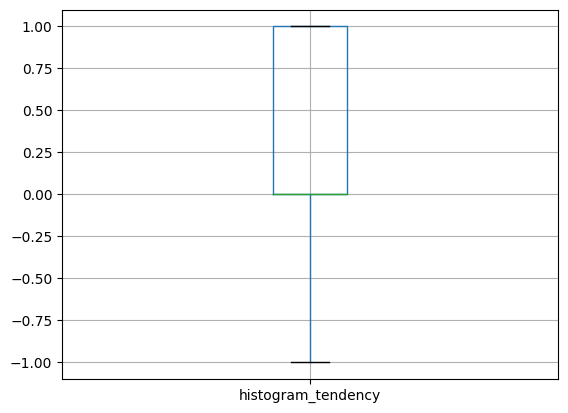

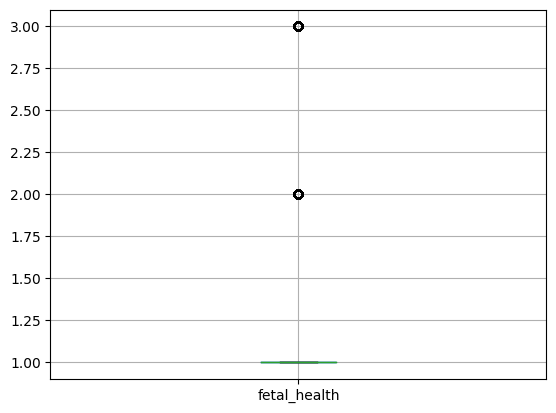

In [ ]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### Outliers are Present in the dataset

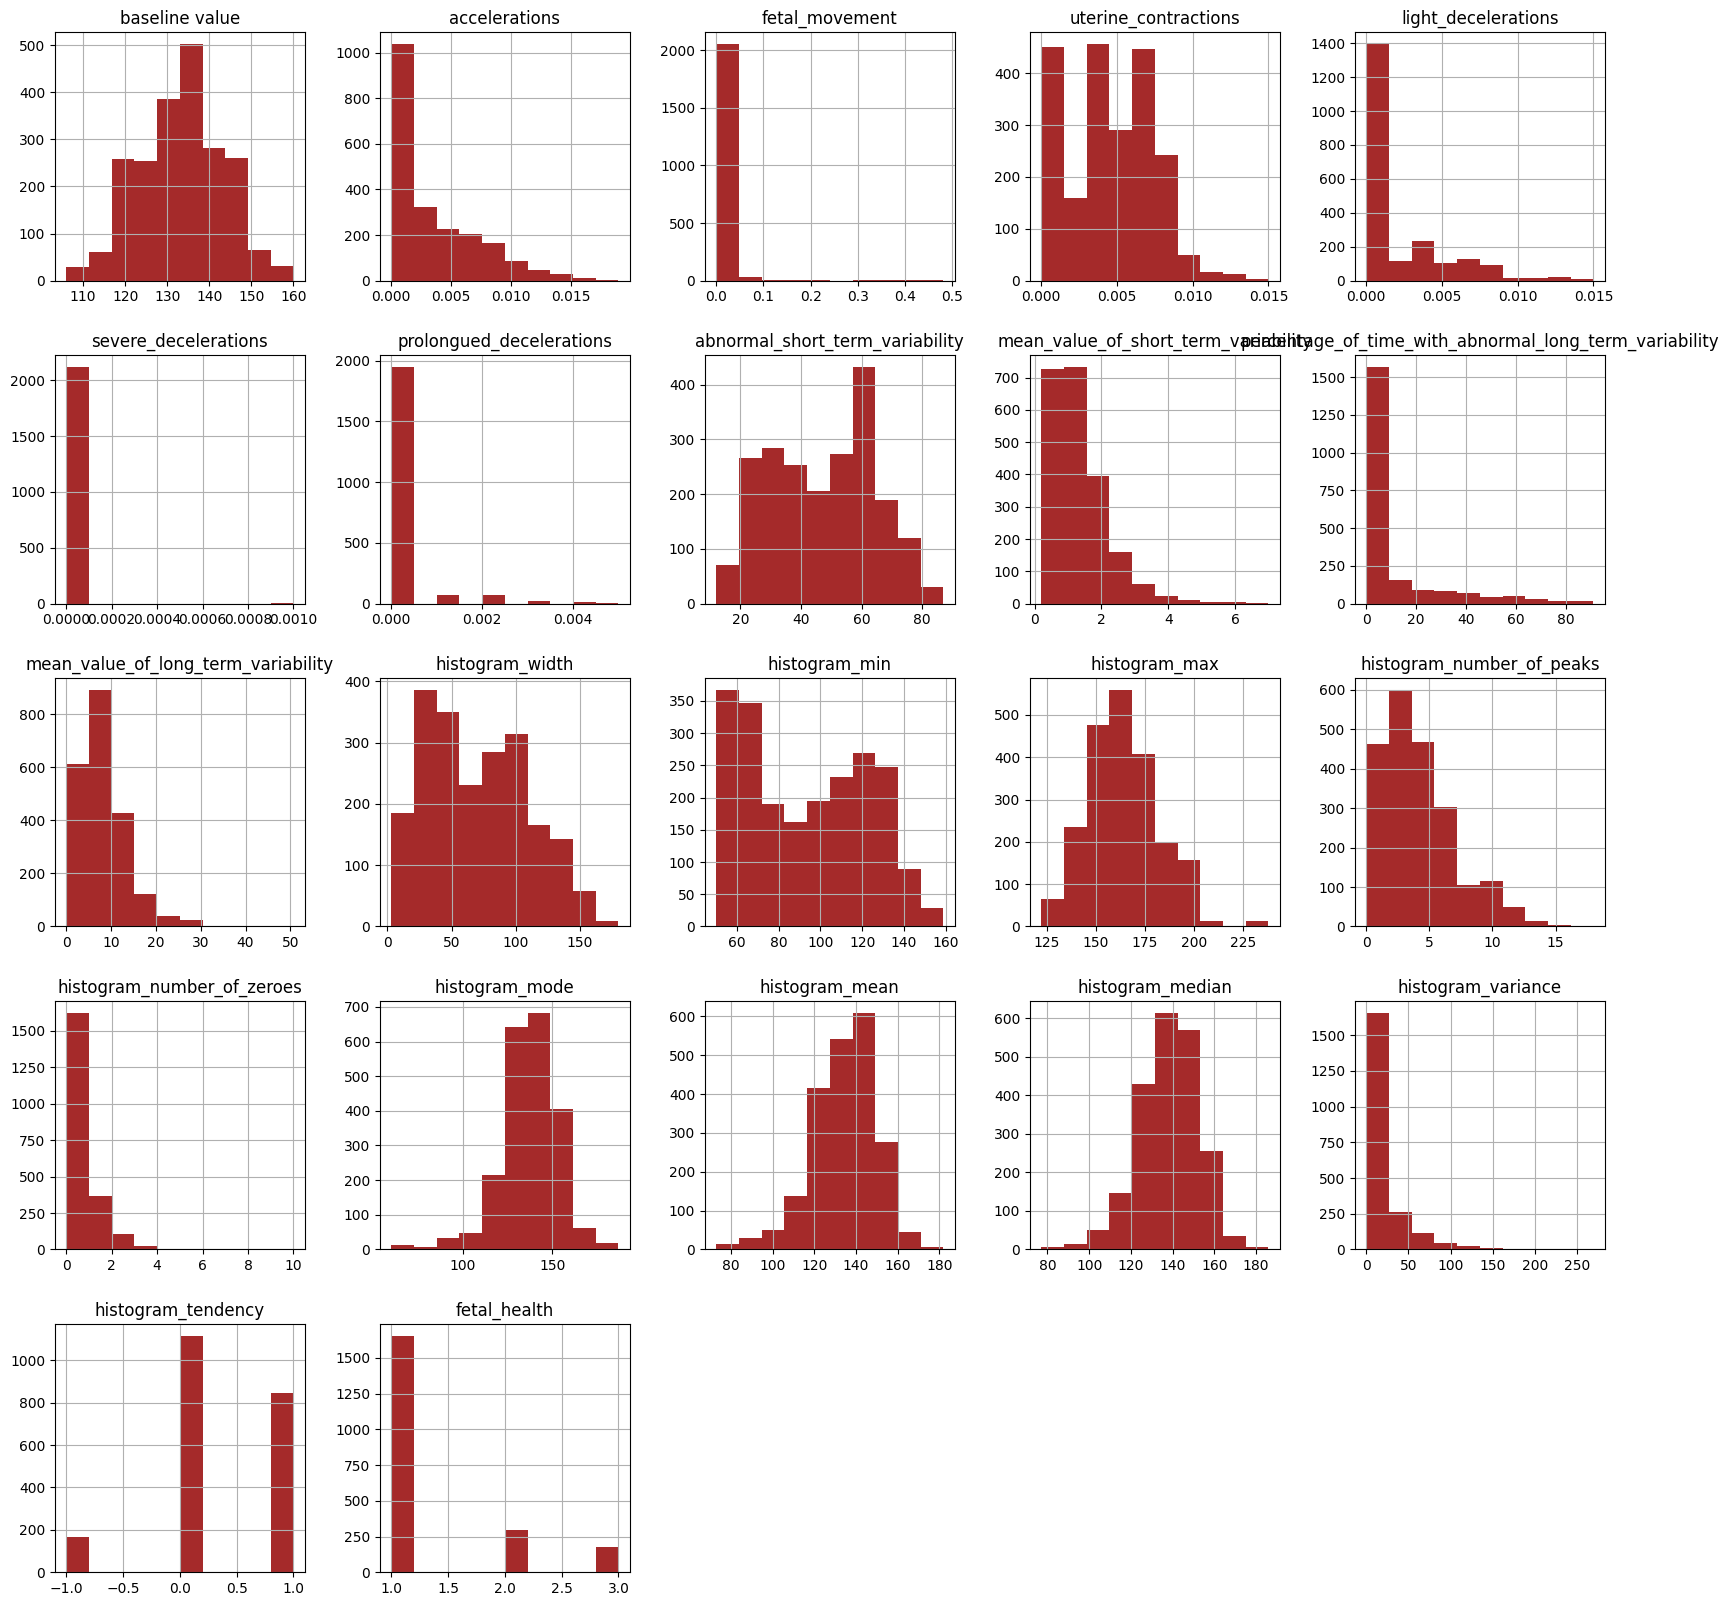

In [ ]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text

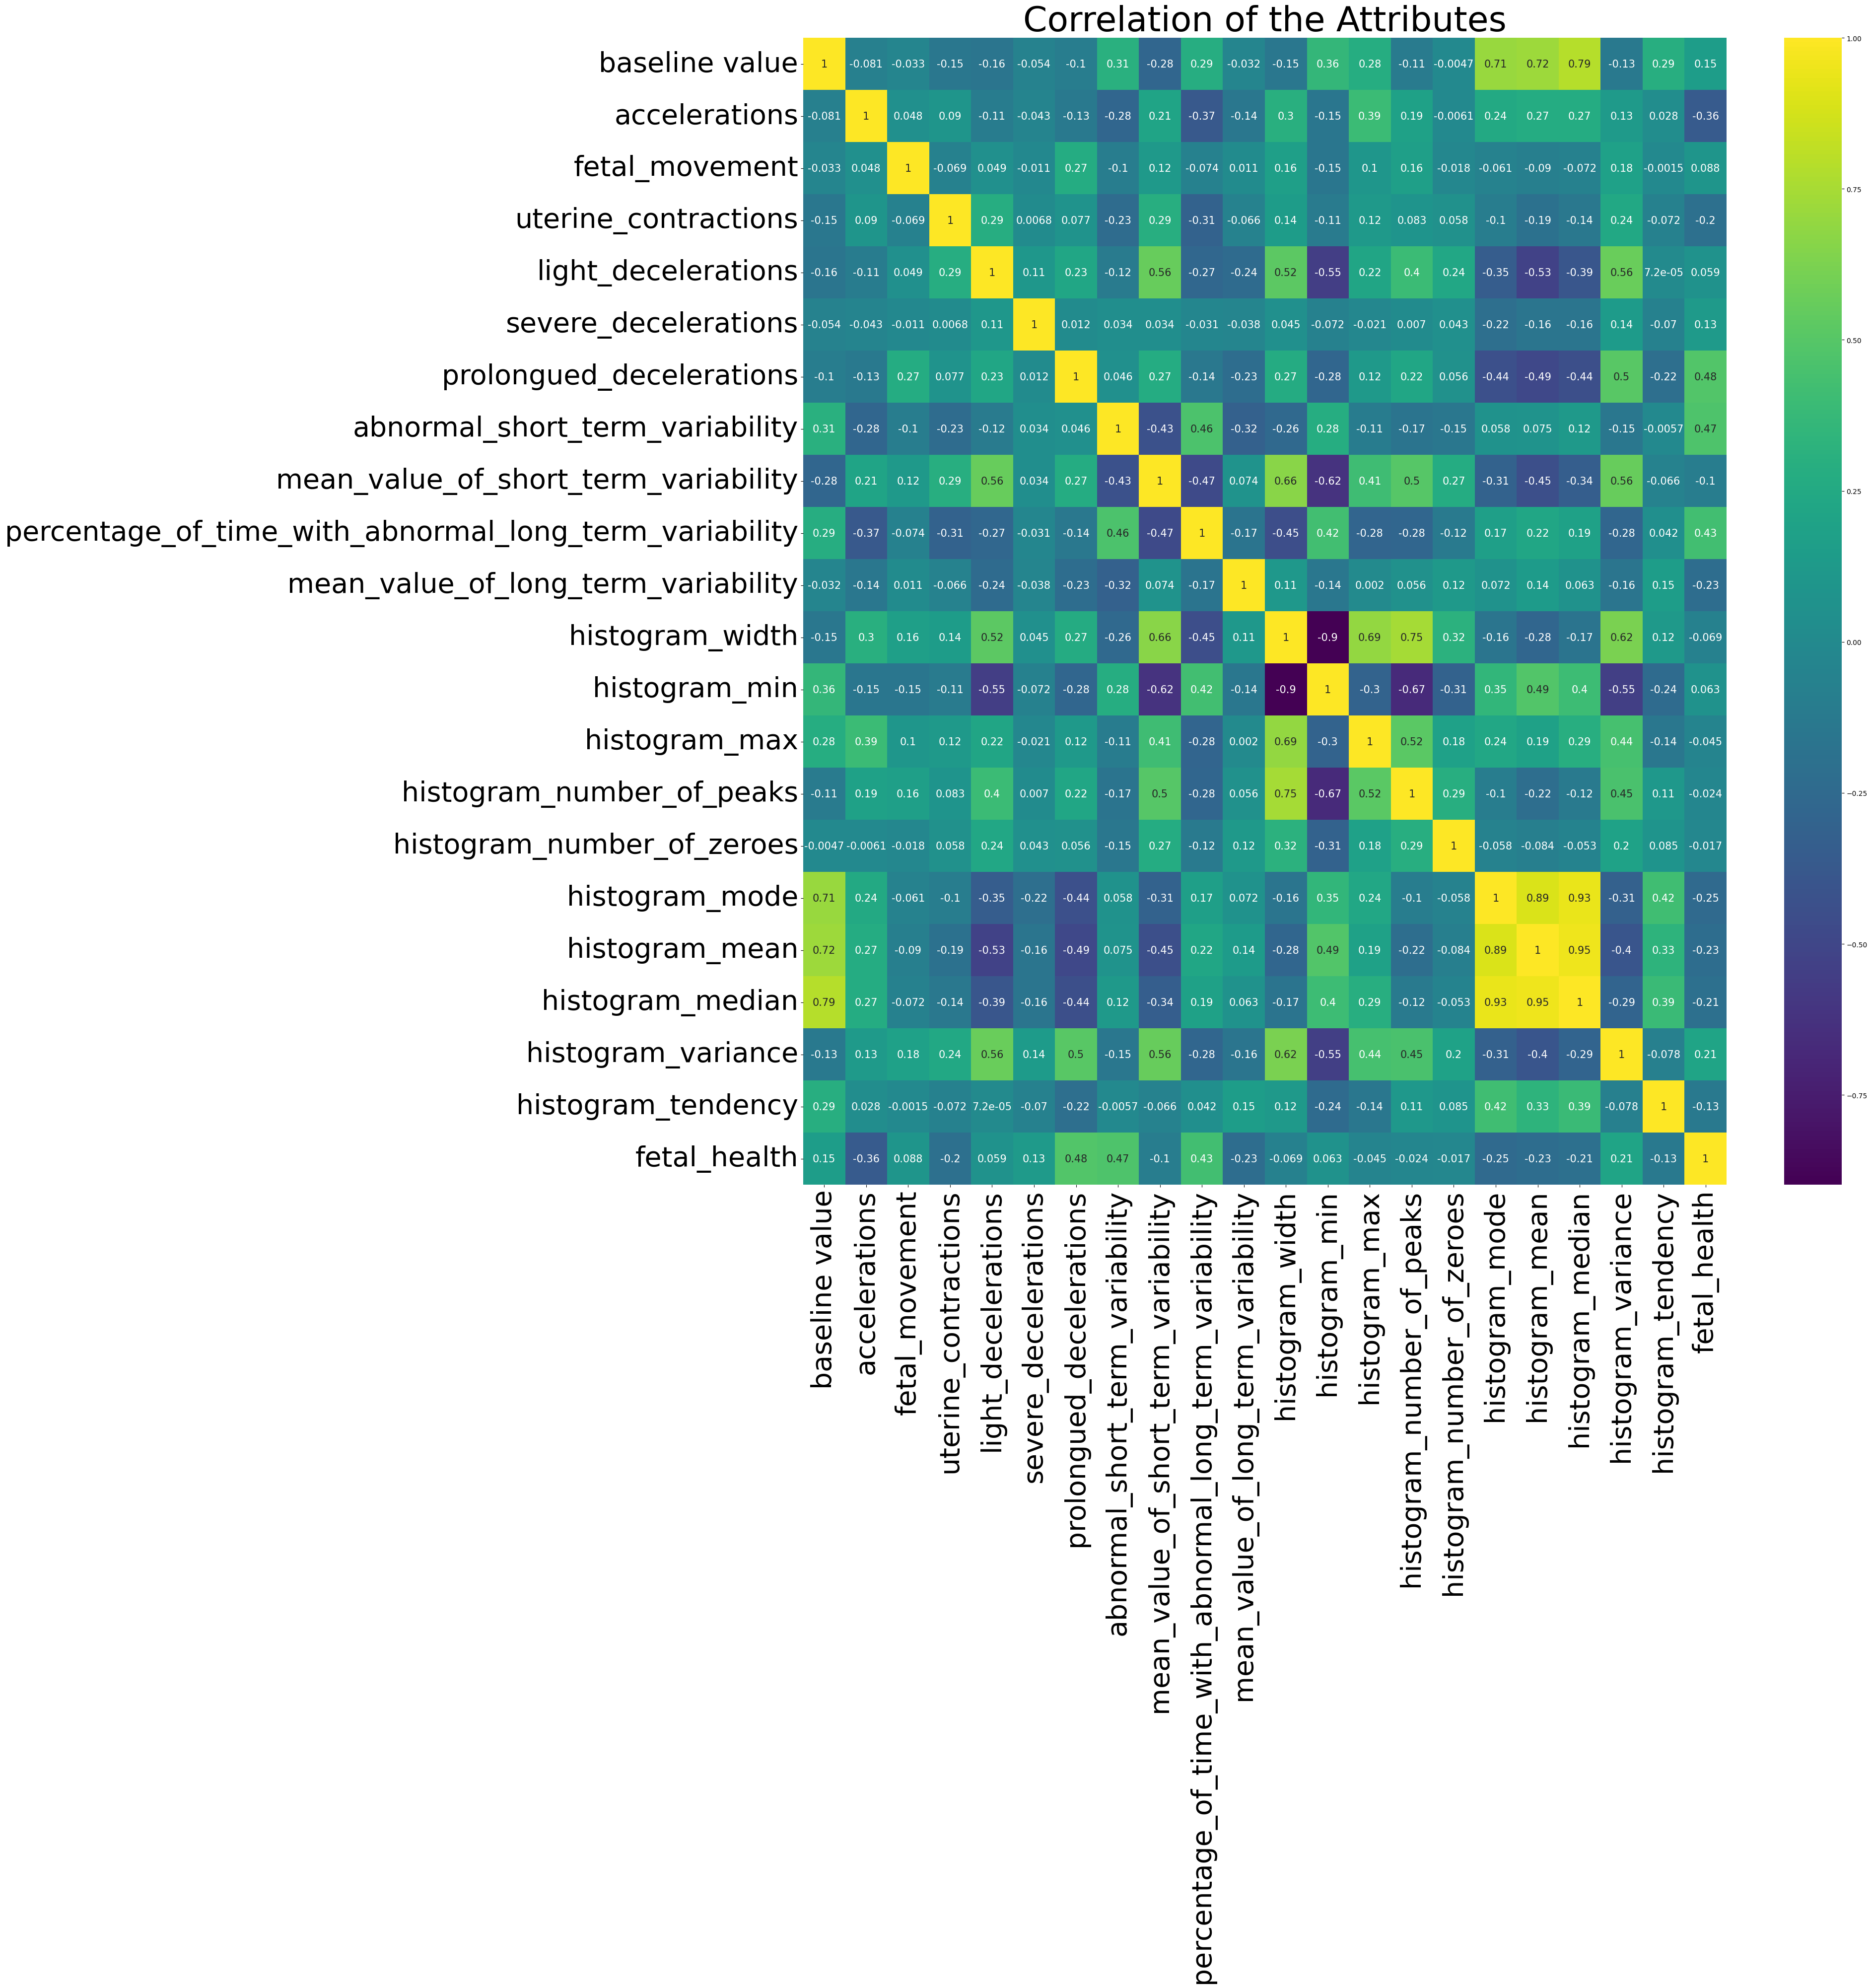

In [ ]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

### The dataframe has a unique form of correlation.

<ipython-input-20-8a17e917fe10>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['baseline value'])


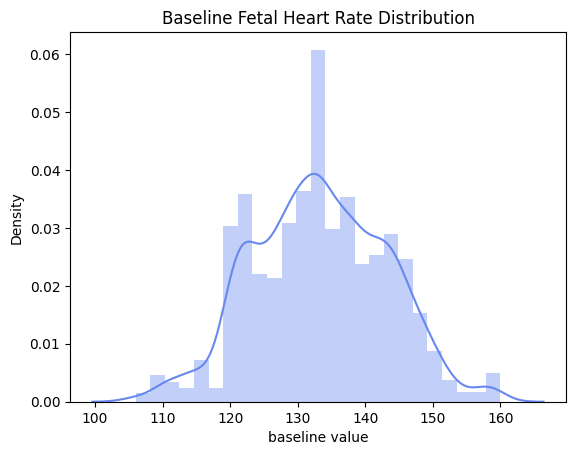

In [ ]:
# Visualization of Baseline Fetal Heart Rate Distribution
sns.set_palette(palette="coolwarm")
sns.distplot(df['baseline value'])
plt.title('Baseline Fetal Heart Rate Distribution');

In [ ]:
# Checking for Unique Values in the dataset
for col in df.columns:
    print(col,'=',df[col].nunique())

baseline value = 48
accelerations = 20
fetal_movement = 102
uterine_contractions = 16
light_decelerations = 16
severe_decelerations = 2
prolongued_decelerations = 6
abnormal_short_term_variability = 75
mean_value_of_short_term_variability = 57
percentage_of_time_with_abnormal_long_term_variability = 87
mean_value_of_long_term_variability = 249
histogram_width = 154
histogram_min = 109
histogram_max = 86
histogram_number_of_peaks = 18
histogram_number_of_zeroes = 9
histogram_mode = 88
histogram_mean = 103
histogram_median = 95
histogram_variance = 133
histogram_tendency = 3
fetal_health = 3


In [ ]:
# Printing the columns of the dataframe
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
# Printing the unique values of fetal_health column
df['fetal_health'].unique()

array([2., 1., 3.])

In [ ]:
# engineering new categorical target column for Normal and At Risk fetal health
df['fetal_health'].replace([1.000, 2.000, 3.000],[0, 1, 2],inplace=True)

### 4. Data Balancing & Spliting:

In [ ]:
# Seperating Independent and Dependent Variables
x=df.drop(labels=['fetal_health'],axis=1)
y=df[['fetal_health']]

<Axes: xlabel='fetal_health'>

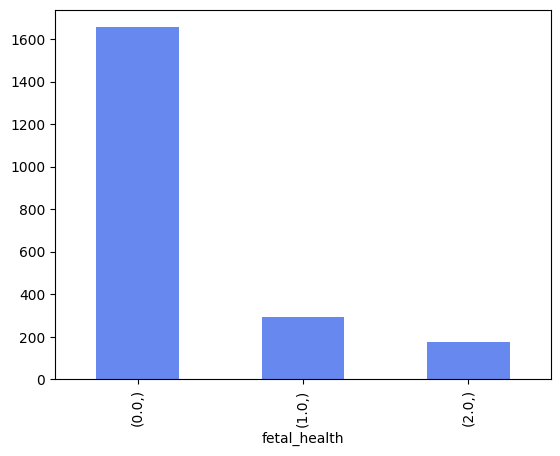

In [ ]:
# Checking for balance distribution of the dataframe
y.value_counts().plot.bar()

In [ ]:
# Creating a data balancing module
sme = SMOTEENN()

In [ ]:
# Balancing the dataset
X, Y = sme.fit_resample(x,y)

<Axes: xlabel='fetal_health'>

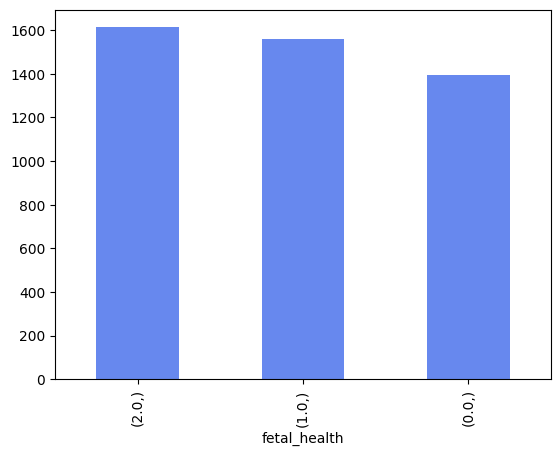

In [ ]:
# Checking for balance distribution of the dataframe
Y.value_counts().plot.bar()

In [ ]:
# Without Scaling
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

In [ ]:
y_test

fetal_health
459            0.0
3832           2.0
2534           1.0
2244           1.0
683            0.0
...            ...
1796           1.0
4299           2.0
3549           2.0
1415           1.0
1209           0.0

[914 rows x 1 columns]

In [ ]:
# With Standard Scaling
ss = StandardScaler()
X_ss=ss.fit_transform(X)
xss_train,xss_test,yss_train,yss_test=train_test_split(X_ss, Y, test_size=0.2)

In [ ]:
# With Min Max Scaling
mms = MinMaxScaler()
X_mms=mms.fit_transform(X)
xmms_train,xmms_test,ymms_train,ymms_test=train_test_split(X_mms, Y, test_size=0.2)

In [ ]:
# With Robust Scaling
rs = RobustScaler()
X_rs=rs.fit_transform(X)
xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(X_rs, Y, test_size=0.2)

## 5. Data Visualization

In [ ]:
# Replacing the values of fetal health column for easier access
Y['fetal_health'].replace([0, 1, 2],['Normal', 'Suspicion', 'At Risk'],inplace=True)

In [ ]:
# creating a balanced dataframe DF
DF=X

In [ ]:
# Adding the fetal health column to the dataframe
DF['Fetal Health']=Y['fetal_health']

In [ ]:
# Checking the dataframe
DF

baseline value  accelerations  fetal_movement  uterine_contractions  \
0         132.000000          0.006        0.000000              0.006000   
1         133.000000          0.003        0.000000              0.008000   
2         134.000000          0.003        0.000000              0.008000   
3         132.000000          0.007        0.000000              0.008000   
4         131.000000          0.005        0.072000              0.008000   
...              ...            ...             ...                   ...   
4562      126.761476          0.000        0.001690              0.006536   
4563      135.000000          0.000        0.014430              0.001477   
4564      132.050093          0.000        0.000927              0.005000   
4565      129.000000          0.000        0.001000              0.005845   
4566      120.000000          0.000        0.000000              0.005000   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.003000                   0.0                  0.000000   
1                0.003000                   0.0                  0.000000   
2                0.003000                   0.0                  0.000000   
3                0.000000                   0.0                  0.000000   
4                0.003000                   0.0                  0.000000   
...                   ...                   ...                       ...   
4562             0.005619                   0.0                  0.001845   
4563             0.000000                   0.0                  0.000000   
4564             0.003511                   0.0                  0.002927   
4565             0.008000                   0.0                  0.002000   
4566             0.008532                   0.0                  0.000494   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           17.000000                              2.100000   
1                           16.000000                              2.100000   
2                           16.000000                              2.400000   
3                           16.000000                              2.400000   
4                           28.000000                              1.400000   
...                               ...                                   ...   
4562                        64.690369                              2.507111   
4563                        69.476648                              0.300000   
4564                        60.292279                              2.719623   
4565                        65.000000                              2.815502   
4566                        60.987227                              1.550639   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                              0.000000       ...   
1                                              0.000000       ...   
2                                              0.000000       ...   
3                                              0.000000       ...   
4                                              0.000000       ...   
...                                                 ...       ...   
4562                                           0.000000       ...   
4563                                          80.859887       ...   
4564                                           0.000000       ...   
4565                                           0.000000       ...   
4566                                           0.000000       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0         68.000000     198.000000                   6.000000   
1         68.000000     198.000000                   5.000000   
2         53.000000     170.000000                  11.000000   
3         53.000000     170.000000                   9.000000   
4         88.000000     154.000000                   

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

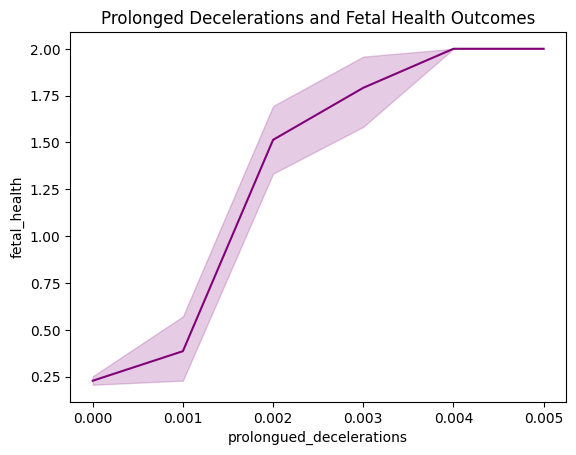

In [ ]:
# Visualization of Prolonged Decelerations Vs Fetal Health Outcomes
sns.set_palette(palette="RdPu_r")
sns.lineplot(x='prolongued_decelerations',y='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Heart Rate')

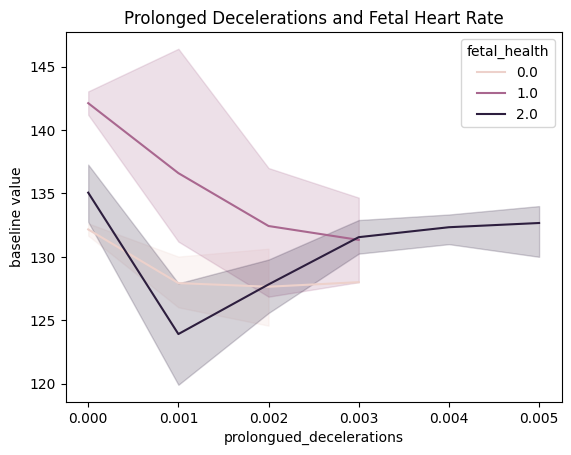

In [ ]:
# Visualization of Prolonged Decelerations Vs Fetal Heart Rate
sns.set_palette(palette="RdPu")
sns.lineplot(x='prolongued_decelerations',y='baseline value',hue='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Heart Rate')

Text(15.920680555555558, 0.5, 'Count')

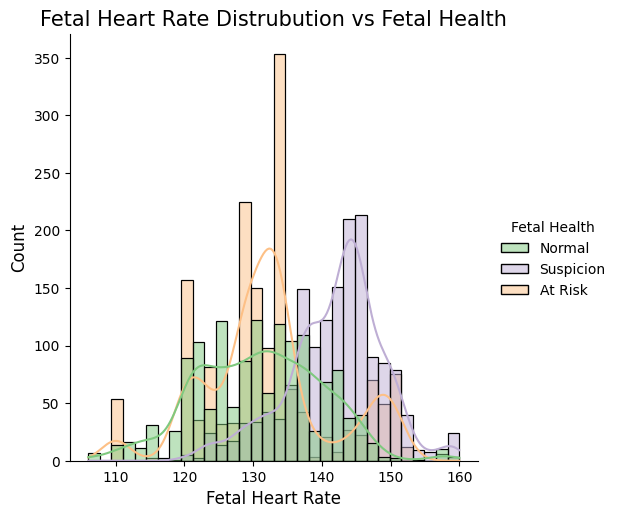

In [ ]:
# Checking the relationship between Fetal Heart Rate Distrubution & Fetal Health
sns.set_palette(palette='Accent')
sns.displot(data=DF, x='baseline value', hue='Fetal Health',hue_order=('Normal','Suspicion','At Risk'), kde=True)
plt.title('Fetal Heart Rate Distrubution vs Fetal Health',fontsize=15)
plt.xlabel("Fetal Heart Rate",fontsize=12)
plt.ylabel('Count',fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text

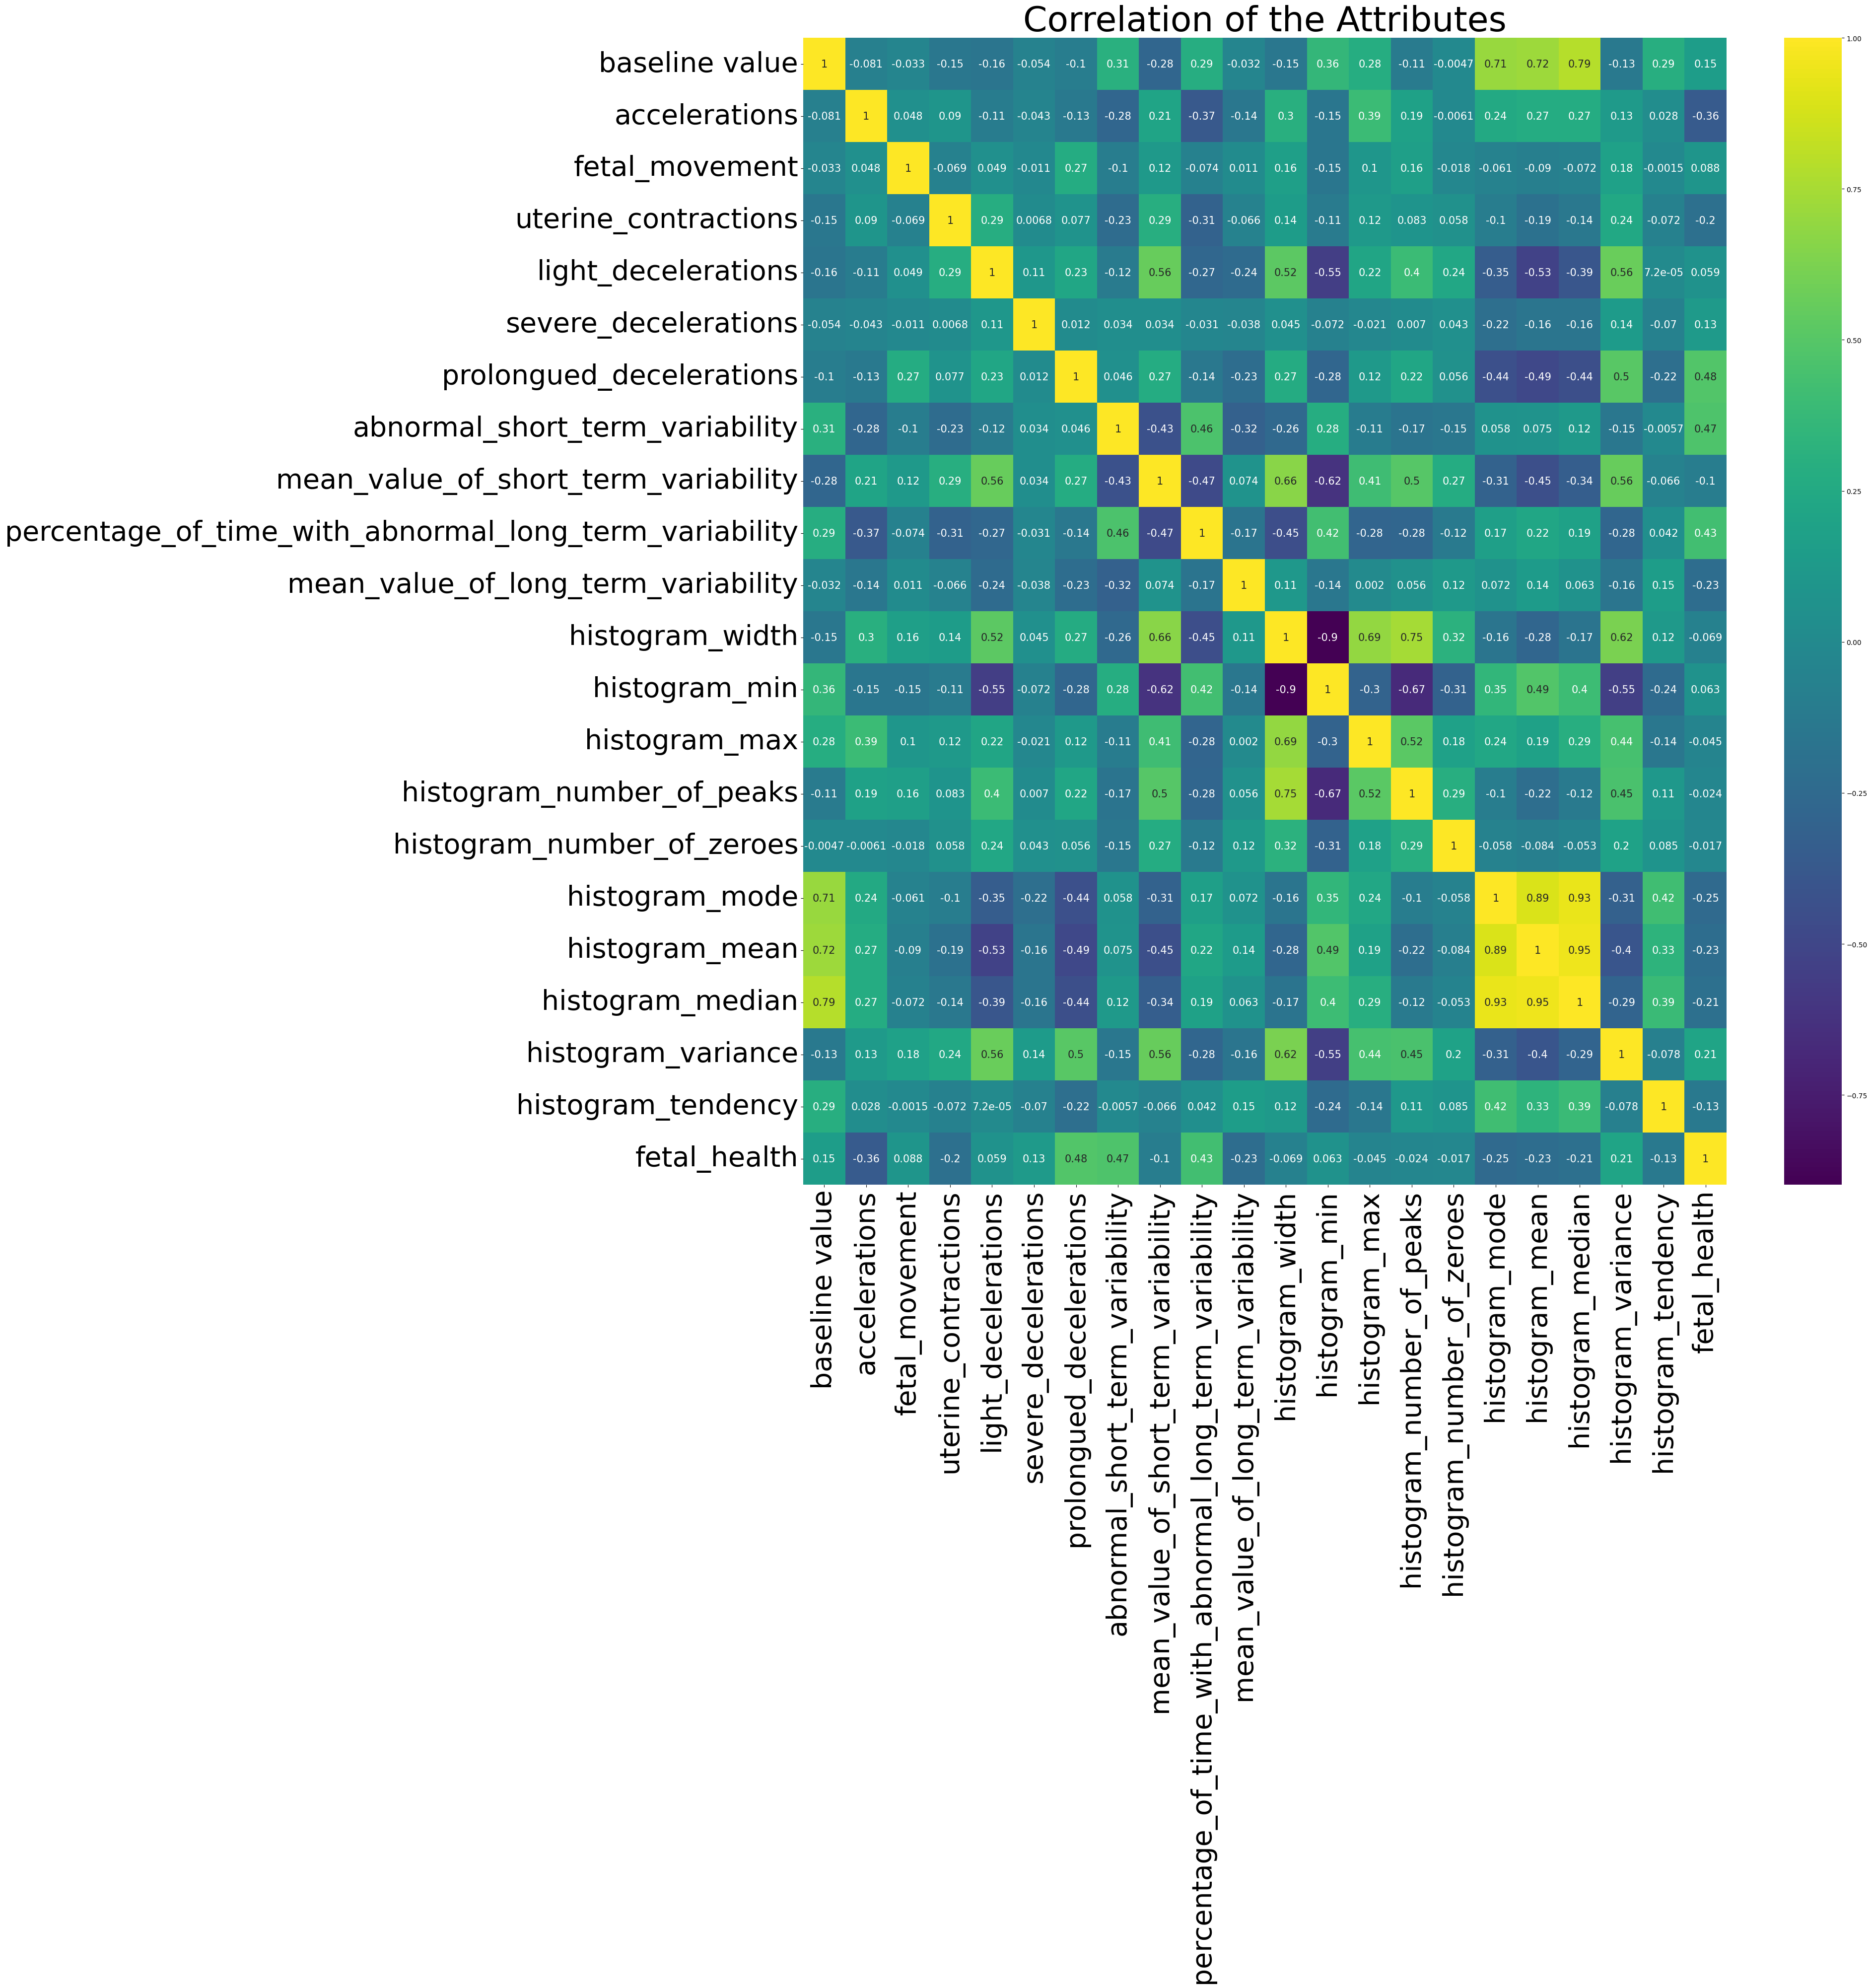

In [ ]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

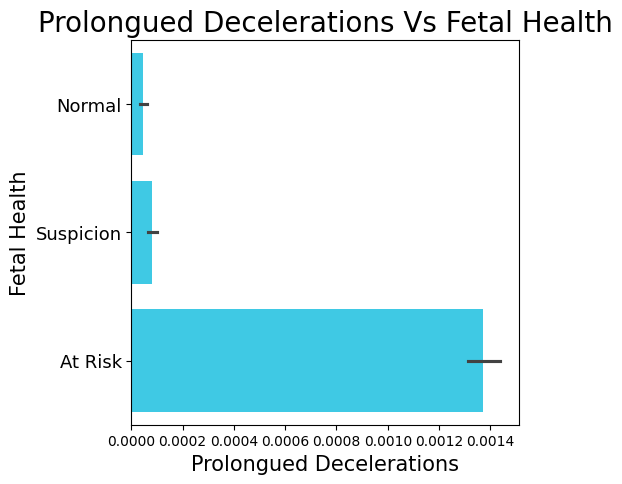

In [ ]:
# Checking the relatinship between Prolongued Decelerations & Fetal Health
sns.set_palette(palette='cool')
sns.barplot(x='prolongued_decelerations',y='Fetal Health', data=DF)
y = [0,1,2]
labels = ['Normal', 'Suspicion','At Risk']
plt.yticks(y, labels,fontsize=13)
plt.title('Prolongued Decelerations Vs Fetal Health',fontsize=20)
plt.gcf().set_size_inches(5,5)
plt.ylabel('Fetal Health',fontsize=15)
plt.xlabel('Prolongued Decelerations',fontsize=15)
plt.show()

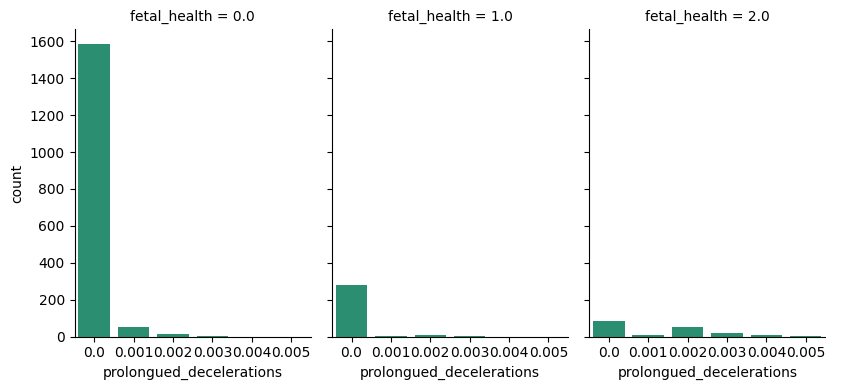

In [ ]:
# Checking the relatinship between Prolongued Decelerations & each Class of Fetal Health
sns.set_palette(palette='Dark2')
sns.catplot(x="prolongued_decelerations", col="fetal_health",
                data=df, kind="count",
                height=4, aspect=0.7)

Text(0.5, 1.0, 'Mean Value of Short-Term and Long-Term Variability in FHR')

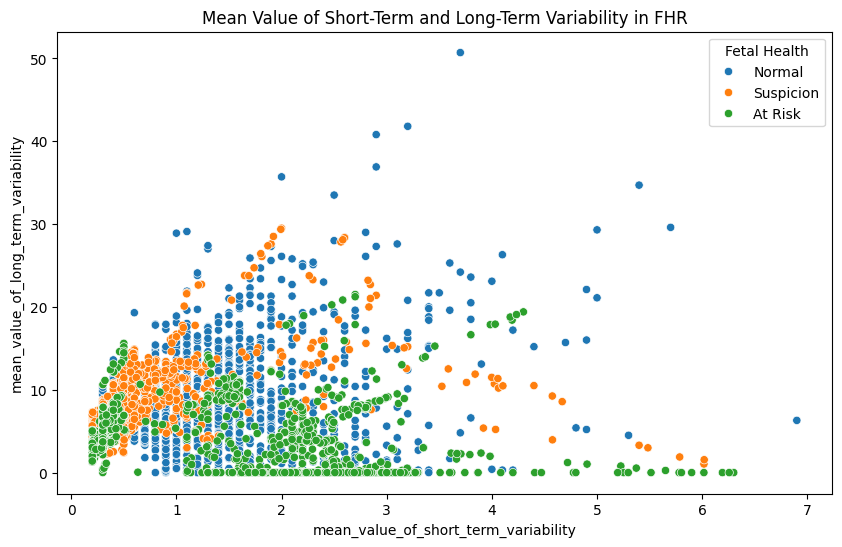

In [ ]:
# Creating a scatter plot for sample from each class
sns.set_palette(palette="tab10")
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='Fetal Health', hue_order=('Normal','Suspicion','At Risk'), data=DF)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR')

In [ ]:
# Replacing the values of fetal health column for Modelling
Y['fetal_health'].replace(['Normal', 'Suspicion', 'At Risk'], [0, 1, 2],inplace=True)

In [ ]:
Y

fetal_health
0                0
1                0
2                0
3                0
4                0
...            ...
4562             2
4563             2
4564             2
4565             2
4566             2

[4567 rows x 1 columns]

## 6. Model Building

In [ ]:

# Decision Tree model build
dt = DecisionTreeClassifier(max_depth=5)

# Gaussian Naive Bayes Model
gnb = GaussianNB()
# XGBoost Classifier Model Build
xgb = XGBClassifier(n_estimators = 100)
# Support Vector Classifier Model Build
svc = SVC(kernel ='linear', C = 3)
# K-Nearest Neighbours Model Build
knn = KNeighborsClassifier(n_neighbors=15)




In [ ]:
# # Logistic Regression Model Build
# lr = LogisticRegression()
# # Decision Tree model build
# dt = DecisionTreeClassifier(max_depth=5)
# # Random Forest Model Build
# rf = RandomForestClassifier(n_estimators = 100)
# # Gaussian Naive Bayes Model
# gnb = GaussianNB()
# # XGBoost Classifier Model Build
# xgb = XGBClassifier(n_estimators = 100)
# # Support Vector Classifier Model Build
# svc = SVC(kernel ='linear', C = 3)
# # K-Nearest Neighbours Model Build
# knn = KNeighborsClassifier(n_neighbors=15)
# # Stochastic Gradient Descent Model Build
# sgd = SGDClassifier(loss='hinge',shuffle=True)
# # Ada Boost Classifier Model Build
# abc = AdaBoostClassifier(n_estimators=100)
# # Ridge Classifier Model Build
# rc = RidgeClassifier()

In [ ]:
# # Multi-layer Perceptron Classification System Model Build
# mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=50, max_iter=150, shuffle=True)
# # Quadratic Discriminant Analysis Model Build
# qda = QuadraticDiscriminantAnalysis()
# # Classifier Chain Model Build
# cc = ClassifierChain(xgb, order='random')
# # Bagging Classifier Model Build
# bc = BaggingClassifier(base_estimator=rf, n_estimators=10)
# # MultiOutput Classifier Model Build
# moc = MultiOutputClassifier(dt)
# # Bernoulli Naive Bayes classifier Model Build
# bnb = BernoulliNB()
# # Gaussian Mixture Model Build
# gm = GaussianMixture(n_components=2)
# # Linear Discriminant Analysis Model Build
# lda = LinearDiscriminantAnalysis()
# # Label Spreading Model Build
# ls = LabelSpreading()
# # Perceptron Model Build
# p = Perceptron()

In [ ]:
# model_list=[lr, dt, rf, gnb, xgb, svc, knn, sgd, abc, rc, mlp, qda, cc, bc, moc, bnb, gm, lda, ls, p]

In [ ]:
model_list=[dt, gnb, xgb, svc, knn]

In [ ]:
def get_score(model_list):
    for i in model_list:
        print(i)

        print('Without Scaling')
        i.fit(x_train,y_train)
        tr=i.score(x_train,y_train)
        print('Train Score:',tr)
        te=i.score(x_test,y_test)
        print('Test Score: ',te)

        print('With Standard Scaling')
        i.fit(xss_train,yss_train)
        trss=i.score(xss_train,yss_train)
        print('Train Score:',trss)
        tess=i.score(xss_test,yss_test)
        print('Test Score: ',tess)

        print('With Min Max Scaling')
        i.fit(xmms_train,ymms_train)
        trmms=i.score(xmms_train,ymms_train)
        print('Train Score:',trmms)
        temms=i.score(xmms_test,ymms_test)
        print('Test Score: ',temms)

        print('With Robust Scaling')
        i.fit(x_train,y_train)
        trrs=i.score(xrs_train,yrs_train)
        print('Train Score:',trrs)
        ters=i.score(xrs_test,yrs_test)
        print('Test Score: ',ters)

In [ ]:
get_score(model_list)

DecisionTreeClassifier(max_depth=5)
Without Scaling
Train Score: 0.9540104024089789
Test Score:  0.9310722100656456
With Standard Scaling
Train Score: 0.9471667122912675
Test Score:  0.9507658643326039
With Min Max Scaling
Train Score: 0.9441554886394744
Test Score:  0.9310722100656456
With Robust Scaling
Train Score: 0.3076923076923077
Test Score:  0.2975929978118162
GaussianNB()
Without Scaling
Train Score: 0.8083766767040789
Test Score:  0.8140043763676149
With Standard Scaling
Train Score: 0.8163153572406241
Test Score:  0.824945295404814
With Min Max Scaling
Train Score: 0.8050917054475774
Test Score:  0.8336980306345733
With Robust Scaling
Train Score: 0.5327128387626608
Test Score:  0.5645514223194749
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A colum

Train Score: 1.0
Test Score:  0.9912472647702407
With Standard Scaling
Train Score: 1.0
Test Score:  0.9967177242888403
With Min Max Scaling
Train Score: 1.0
Test Score:  0.9857768052516411
With Robust Scaling
Train Score: 0.3547768957021626
Test Score:  0.35776805251641136
SVC(C=3, kernel='linear')
Without Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.8907747057213249
Test Score:  0.8938730853391685
With Standard Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9192444566110046
Test Score:  0.9332603938730853
With Min Max Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9203394470298385
Test Score:  0.9091903719912473
With Robust Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Train Score: 0.33479332055844513
Test Score:  0.33150984682713347
KNeighborsClassifier(n_neighbors=15)
Without Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.9548316452231043
Test Score:  0.9529540481400438
With Standard Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.9556528880372297
Test Score:  0.9638949671772429
With Min Max Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.9616753353408157
Test Score:  0.9485776805251641
With Robust Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Score: 0.38872159868601147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Score:  0.3862144420131291


### 7. Model Evaluation:
### Best Models



1. XGBClassifier
* Without Scaling 0.9912280701754386
* With Min Max Scaling 0.9967105263157895

2. KNN classification
* Without Scaling 0.9475982532751092
* With Min Max Scaling 0.9639737991266376

3. Decision tree
* Without Scaling 0.9355895196506551
* With Min Max Scaling 0.9301310043366822


In [ ]:
def without_s_score(m):

    print(m, 'Without Scaling')

    m.fit(x_train,y_train)

    y_score = m.predict_proba(x_test)
    y_pred = m.predict(x_test)

#     plot_roc(y_test, y_score)
#     plt.show()

#     plot_precision_recall(y_test, y_score)
#     plt.show()

    print("Accuracy: ", accuracy_score(y_test, y_pred))

    print(f'Classification Report:\n {metrics.classification_report(y_test, y_pred)}\n')

    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' )
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [ ]:
def with_ss_score(m):

    print(m, 'With Standard Scaling')

    m.fit(xss_train,yss_train)

    y_score = m.predict_proba(xss_test)
    y_pred = m.predict(xss_test)

#     plot_roc(yss_test, y_score)
#     plt.show()

#     plot_precision_recall(yss_test, y_score)
#     plt.show()

    print("Accuracy: ", accuracy_score(yss_test, y_pred))

    print(f'Classification Report:\n {metrics.classification_report(yss_test, y_pred)}\n')

    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(yss_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' )
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [ ]:
def with_mms_score(m):

    print(m, 'With Min Max Scaling')

    m.fit(xmms_train,ymms_train)

    y_score = m.predict_proba(xmms_test)
    y_pred = m.predict(xmms_test)

#     plot_roc(ymms_test, y_score)
#     plt.show()

#     plot_precision_recall(ymms_test, y_score)
#     plt.show()

    print("Accuracy: ", accuracy_score(ymms_test, y_pred))

    print(f'Classification Report:\n {metrics.classification_report(ymms_test, y_pred)}\n')

    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(ymms_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' )
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [ ]:
def with_rs_score(m):

    print(m, 'With Robust Scaling')

    m.fit(xrs_train,yrs_train)

    y_score = m.predict_proba(xrs_test)
    y_pred = m.predict(xrs_test)

#     plot_roc(yrs_test, y_score)
#     plt.show()

#     plot_precision_recall(yrs_test, y_score)
#     plt.show()

    print("Accuracy: ", accuracy_score(yrs_test, y_pred))

    print(f'Classification Report:\n {metrics.classification_report(yrs_test, y_pred)}\n')

    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(yrs_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' )
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) Without Scaling
Accuracy:  0.9912472647702407
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       284
         1.0       0.99      0.99      0.99       300
 

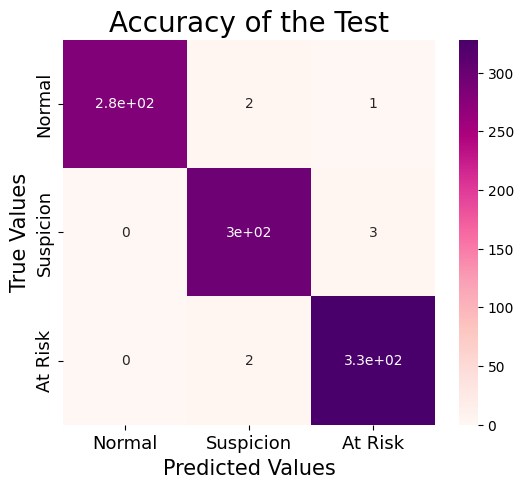

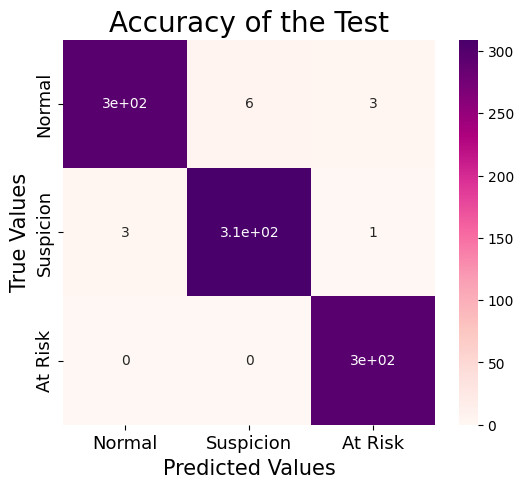

In [ ]:
# Evaluating XGBoostclassifier Models
without_s_score(xgb)
with_mms_score(xgb)

DecisionTreeClassifier(max_depth=5) Without Scaling
Accuracy:  0.9310722100656456
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       284
         1.0       0.88      0.93      0.90       300
         2.0       0.99      0.95      0.97       330

    accuracy                           0.93       914
   macro avg       0.93      0.93      0.93       914
weighted avg       0.93      0.93      0.93       914


DecisionTreeClassifier(max_depth=5) With Min Max Scaling
Accuracy:  0.9310722100656456
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       305
         1.0       0.89      0.93      0.91       313
         2.0       0.99      0.97      0.98       296

    accuracy                           0.93       914
   macro avg       0.93      0.93      0.93       914
weighted avg       0.93      0.93      0.93       914




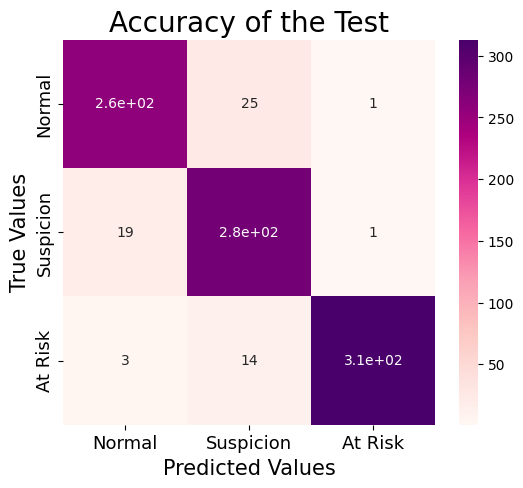

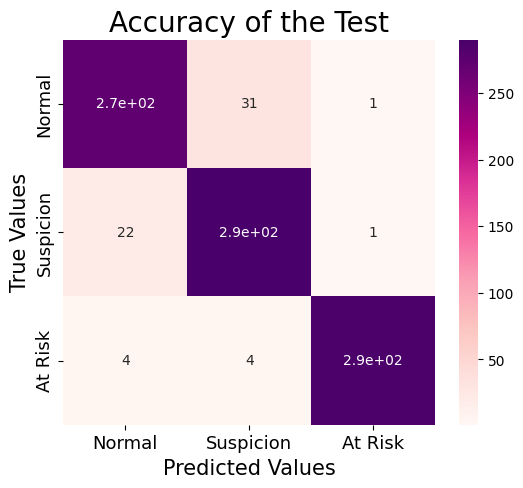

In [ ]:
# Evaluating Decision tree Classifier Models
without_s_score(dt)
with_mms_score(dt)

GaussianNB() Without Scaling
Accuracy:  0.8140043763676149
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       284
         1.0       0.69      0.91      0.78       300
         2.0       0.92      0.70      0.80       330

    accuracy                           0.81       914
   macro avg       0.84      0.82      0.82       914
weighted avg       0.84      0.81      0.82       914


GaussianNB() With Standard Scaling
Accuracy:  0.824945295404814
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       263
         1.0       0.71      0.93      0.80       333
         2.0       0.96      0.64      0.76       318

    accuracy                           0.82       914
   macro avg       0.86      0.83      0.83       914
weighted avg       0.85      0.82      0.82       914




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB() With Min Max Scaling
Accuracy:  0.8336980306345733
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       305
         1.0       0.72      0.90      0.80       313
         2.0       0.91      0.70      0.79       296

    accuracy                           0.83       914
   macro avg       0.85      0.83      0.83       914
weighted avg       0.85      0.83      0.83       914




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


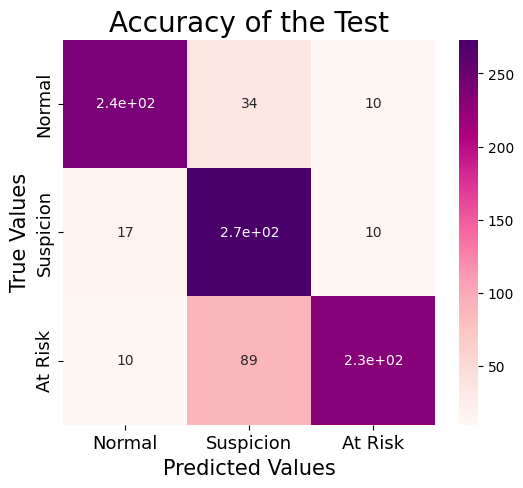

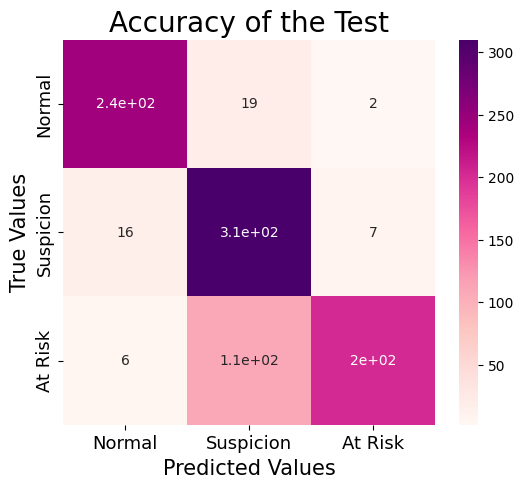

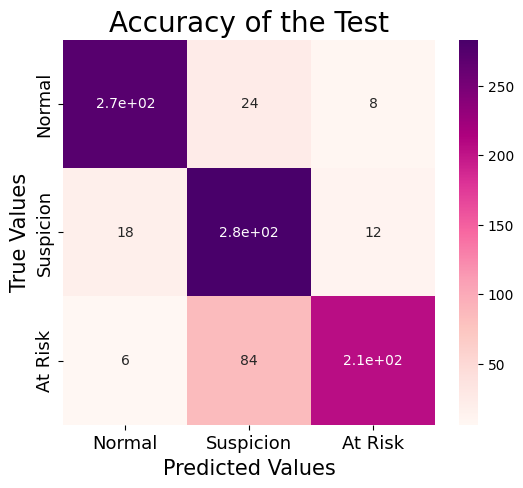

In [ ]:
# Evaluating BaggingClassifier Models
without_s_score(gnb)
with_ss_score(gnb)
with_mms_score(gnb)

## 8. Model Selection:

In [ ]:
xgb.fit(x_train,y_train)
y_score = xgb.predict_proba(x_test)
y_pred = xgb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9912472647702407


### All the models seems to have some imperfections; lets go with XGBoost algorithm Model Without Scaling, since it showed the close to perfect score.

## 9. Saving the Selected Model:

In [ ]:
# Saving the XGBoost Classifier Model
data={"Model": xgb}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
# @title Default title text
# Checking the saved model
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

model=data["Model"]

In [ ]:
data

{'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...)}

In [ ]:
# Storing one entry of the testing dataset
test=x_test.iloc[7:10,:]

In [ ]:
type(x_test)
# import pandas as pd

pandas.core.frame.DataFrame

In [ ]:
x_test.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
459       146.000000       0.000000        0.000000              0.008000   
3832      133.310591       0.000000        0.000124              0.010000   
2534      149.532415       0.000000        0.000000              0.004823   
2244      142.597068       0.000299        0.000995              0.005701   
683       122.000000       0.000000        0.000000              0.005000   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
459              0.001000                   0.0                     0.000   
3832             0.002621                   0.0                     0.002   
2534             0.000000                   0.0                     0.000   
2244             0.000000                   0.0                     0.000   
683              0.005000                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
459                         28.000000                              1.500000   
3832                        59.875764                              2.968941   
2534                        62.822528                              0.400000   
2244                        58.298534                              0.409951   
683                         26.000000                              1.300000   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
459                                           11.000000       ...   
3832                                           0.000000       ...   
2534                                          65.354943       ...   
2244                                          30.502444       ...   
683                                            0.000000       ...   

      histogram_width  histogram_min  histogram_max  \
459         82.000000      92.000000     174.000000   
3832       105.062118      59.689409     164.751528   
2534        11.645057     147.064829     158.709886   
2244        22.398045     140.800977     163.199023   
683         47.000000      85.000000     132.000000   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
459                    6.000000                    1.000000      150.000000   
3832                   5.186354                    0.062118      124.503055   
2534                   1.000000                    0.000000      154.242301   
2244                   2.000000                    0.000000      154.800977   
683                    3.000000                    2.000000      126.000000   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
459       147.000000        150.000000            8.000000                 1.0  
3832       97.372709        105.869654           79.751528                 0.0  
2534      153.887358        155.887358            0.000000                 1.0  
2244      152.900489        154.900489            1.099511                 0.0  
683       119.000000        123.000000           10.000000                 1.0  

[5 rows x 21 columns]

In [ ]:
print(model.predict(x_test))

[0 2 1 1 0 0 1 1 1 1 1 0 1 2 0 0 1 1 1 2 1 1 2 2 1 1 0 2 2 2 2 1 2 0 2 1 1
 1 2 0 2 2 1 1 0 0 1 2 1 2 0 0 1 1 2 2 0 2 1 0 2 2 1 0 0 0 2 1 0 0 0 2 2 1
 0 2 1 1 2 0 1 0 1 2 2 2 0 0 0 0 2 0 1 1 0 2 1 0 1 0 0 1 1 1 2 1 2 0 0 2 1
 0 0 2 2 2 2 2 2 1 2 0 2 2 2 2 2 0 1 1 1 2 0 1 1 2 1 1 2 2 2 0 1 1 2 1 2 2
 2 1 2 0 1 2 1 0 0 2 2 1 0 2 2 2 2 1 2 2 0 1 1 2 0 1 1 1 1 0 1 2 1 1 2 0 2
 1 1 2 1 1 2 2 0 2 2 2 0 1 2 0 2 1 2 1 1 0 2 2 0 1 2 0 1 0 1 0 2 1 1 2 2 2
 1 1 0 1 0 2 2 0 0 2 0 1 0 1 2 2 0 1 0 0 0 2 0 1 2 2 2 1 1 0 0 2 2 1 2 0 0
 1 2 2 2 2 2 0 1 1 0 1 1 2 0 1 1 1 2 1 0 1 0 2 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 2 2 2 2 1 2 0 0 2 2 2 2 2 1 1 1 0 2 0 0 0 0 0 2 2 2 1 0 1 2 1 0 1 0 1 2 1
 1 2 2 1 0 1 1 2 0 0 0 0 1 1 1 2 0 0 1 0 1 1 2 2 2 2 2 0 1 2 2 0 1 0 1 0 2
 2 2 0 2 1 0 2 2 2 2 1 0 0 1 2 1 0 0 2 1 2 0 1 2 2 0 2 1 1 2 1 1 0 0 2 0 2
 1 2 2 0 0 2 2 0 0 0 0 0 1 1 1 1 1 2 2 0 0 1 1 0 1 1 1 2 0 1 1 0 2 0 0 1 0
 0 2 2 0 2 0 0 0 1 0 2 2 2 1 2 0 1 2 0 0 0 2 0 1 0 2 1 0 0 2 2 0 1 1 1 2 2
 1 2 2 1 0 2 2 1 2 1 0 2 

In [ ]:
# Checking the data
test

baseline value  accelerations  fetal_movement  uterine_contractions  \
1422      138.000000          0.002             0.0              0.006000   
2609      148.775513          0.000             0.0              0.007224   
1618      152.000000          0.000             0.0              0.002000   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1422                0.000                   0.0                       0.0   
2609                0.000                   0.0                       0.0   
1618                0.002                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1422                        43.000000                              1.000000   
2609                        48.653081                              0.561224   
1618                        61.000000                              0.500000   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1422                                           19.00000       ...   
2609                                           17.16327       ...   
1618                                           61.00000       ...   

      histogram_width  histogram_min  histogram_max  \
1422        44.000000     129.000000      173.00000   
2609        19.612243     149.224487      168.83673   
1618        61.000000      99.000000      160.00000   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
1422                        8.0                         2.0      162.000000   
2609                        2.0                         0.0      159.122433   
1618                        4.0                         3.0      159.000000   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
1422      155.000000        159.000000             9.00000                 0.0  
2609      159.448973        161.061216             1.16327                 0.0  
1618      155.000000        158.000000             4.00000                 1.0  

[3 rows x 21 columns]

In [ ]:
# Storing the data for testing purposes
test.to_csv('test_csv.csv',index=0)

In [ ]:
class MyClass:
    def __init__(self):
        self._my_property = None

    @property
    def my_property(self):
        return self._my_property

    @my_property.setter
    def my_property(self, value):
        # Validation logic can be added here
        self._my_property = value

    @my_property.deleter
    def my_property(self):
        del self._my_property


In [ ]:
obj = MyClass()
obj.my_property = 10  # Calls the setter method
value = obj.my_property  # Calls the getter method

# del obj.my_property  # Calls the deleter method


#my own test

In [ ]:
# Importing training data
df_dataset=pd.read_csv('/content/fetal_health.csv')

In [ ]:
df_dataset

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [ ]:
import pandas as pd
test_first_row = df_dataset

In [ ]:
# test_first_row.iloc[0]

In [ ]:
test_first_row.drop(columns=['fetal_health'], inplace=True)


In [ ]:
test_first_row

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_width  histogram_min  histogram_max  \
0                64.0           62.0          126.0   
1               130.0           68.0          198.0   
2               130.0           68.0          198.0   
3               117.0           53.0          170.0   
4               117.0           53.0          170.0   
...               ...            ...            

In [ ]:

import pandas as pd
import xgboost as xgb

# Get 21 values as input
values = []
ran=test_first_row.columns
print(ran)
for i in ran:
    value = input(f"Enter value {i}: ")
    values.append(value)

# Create DataFrame variable
column_labels = [f'{i}' for i in ran]

df = pd.DataFrame(data=[values], columns=column_labels)

print("DataFrame:")
df



Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')


In [ ]:
# df_seenu=test_first_row.iloc[[5]]

In [ ]:
df=df.astype(float)

In [ ]:
# df_seenu

In [ ]:
df

In [ ]:
# type(df)

In [ ]:
# type(df)

In [ ]:
test_first_row

In [ ]:
# type(test_first_row)
#
# print(model.predict(df_seenu))

In [ ]:
# ran=df

In [ ]:
# df = df.astype(float)


In [ ]:
# type(test_first_row)

print(model.predict(df))